# Trabalho de Inteligência Artificial

<h3>Integrantes</h3>
<table width="600" border="2">
    <tr>
        <td><b>Nome do Aluno</b></td>
        <td><b>RA</b></td>
     </tr>  
   <tr>
       <td>Álvaro Hibide Claver</td>
       <td>10368757</td>
   </tr>
   <tr>
       <td>Matheus Marçal Ramos de Oliveira</td>
       <td>10409001</td>
   </tr>
   <tr>
       <td>Sabrina Midori Futami Teixeira de Carvalho</td>
       <td>10410220</td>
</table>

O trabalho utiliza o dataset sintético **“Predict Pet Adoption Status Dataset”**, do Kaggle (2024), com informações de 2007 animais de abrigos. Após a remoção de colunas irrelevantes, verificação de nulos, padronização de variáveis e conversão de categorias para valores numéricos, os dados foram filtrados para análise apenas de gatos e cachorros. A análise exploratória, com histogramas e boxplots, mostrou distribuições de idade semelhantes entre as espécies, presença significativa de animais idosos, maior taxa de adoção para cachorros e medianas próximas de tempo de permanência, ainda que gatos apresentem mais casos de estadias longas. Também se observou que animais adotados tendem a permanecer menos tempo nos abrigos, reforçando a relevância de fatores como idade, porte e saúde no processo de adoção.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Iniciando Tratamento de Dados

In [ ]:
csv_path = "/content/pet_adoption_data.csv"
df = pd.read_csv(csv_path)

In [ ]:
print("Colunas do dataset:", df.columns.tolist())

Colunas do dataset: ['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg', 'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner', 'AdoptionLikelihood']


### Limpeza e normalização simples

In [ ]:
# Remover a coluna PetID, por ser irrelevante
df = df.drop(columns=["PetID"])

In [ ]:
# Remover a coluna WeightKg elevada variação e números incorentes
df = df.drop(columns=["WeightKg"])

In [ ]:
# Verificando se existe nulidade nas colunas do df
print(df.isnull().sum())

PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64


### Verificando se os valores binários são apenas 0 ou 1

In [ ]:
binarias = ["Vaccinated", "HealthCondition", "PreviousOwner", "AdoptionLikelihood"]

for col in binarias:
    print(f"{col} → valores únicos antes: {df[col].unique()}")
    df[col] = df[col].apply(lambda x: 1 if x > 1 else (0 if x < 0 else x))
    print(f"{col} → valores únicos depois: {df[col].unique()}")


Vaccinated → valores únicos antes: [1 0]
Vaccinated → valores únicos depois: [1 0]
HealthCondition → valores únicos antes: [0 1]
HealthCondition → valores únicos depois: [0 1]
PreviousOwner → valores únicos antes: [0 1]
PreviousOwner → valores únicos depois: [0 1]
AdoptionLikelihood → valores únicos antes: [0 1]
AdoptionLikelihood → valores únicos depois: [0 1]


In [ ]:
# Filtrando apenas linhas onde PetType == "Cat" ou PetType == "Dog" e resetando o index original
df_cats = df[df["PetType"] == "Cat"].reset_index(drop=True)
df_dogs = df[df["PetType"] == "Dog"].reset_index(drop=True)

In [ ]:
# Mostrando resultado com gatos apenas
print(f"Total de registros: {len(df_cats)}")
print(f"Registros apenas com gatos: {len(df_cats)}\n")

df_cats.head()

Total de registros: 505
Registros apenas com gatos: 505



,PetType,Breed,AgeMonths,Color,Size,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Cat,Siamese,13,Orange,Large,1,0,3,137,0,1
1,Cat,Siamese,27,Black,Large,1,0,5,135,0,0
2,Cat,Persian,160,Brown,Medium,1,0,11,404,0,1
3,Cat,Persian,8,Orange,Small,1,1,64,405,1,0
4,Cat,Persian,50,White,Medium,1,0,13,109,0,1


In [ ]:
# Mostrando resultado com cachorros apenas
print(f"Total de registros: {len(df_dogs)}")
print(f"Registros apenas com gatos: {len(df_dogs)}\n")

df_dogs.head()

Total de registros: 522
Registros apenas com gatos: 522



,PetType,Breed,AgeMonths,Color,Size,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Dog,Golden Retriever,136,Orange,Medium,0,0,85,385,0,0
1,Dog,Labrador,70,Brown,Large,0,0,87,301,1,0
2,Dog,Golden Retriever,172,Brown,Large,1,0,4,76,1,0
3,Dog,Labrador,44,Gray,Small,0,1,6,300,0,0
4,Dog,Labrador,3,Gray,Large,1,0,50,369,1,1


### Tratamento colunas categóricas para conversão numérica para uso com ML

Como algoritmos de Machine Learning não trabalham diretamente com variáveis categóricas (não numéricas), foi necessário converter essas variáveis em representações numéricas. Para isso, realizou-se a transformação em valores binários/booleanos, geralmente representados por 0 e 1.

In [ ]:
# Gatos
categoricas = ["Breed", "Color", "Size"]
print("Colunas categóricas - Gatos:", categoricas)

# Transformando em variáveis binárias (0/1)
df_cats_encoded = pd.get_dummies(df_cats, columns=categoricas)

print(df_cats_encoded.head())


Colunas categóricas - Gatos: ['Breed', 'Color', 'Size']
  PetType  AgeMonths  Vaccinated  HealthCondition  TimeInShelterDays  \
0     Cat         13           1                0                  3   
1     Cat         27           1                0                  5   
2     Cat        160           1                0                 11   
3     Cat          8           1                1                 64   
4     Cat         50           1                0                 13   

   AdoptionFee  PreviousOwner  AdoptionLikelihood  Breed_Persian  \
0          137              0                   1          False   
1          135              0                   0          False   
2          404              0                   1           True   
3          405              1                   0           True   
4          109              0                   1           True   

   Breed_Siamese  Color_Black  Color_Brown  Color_Gray  Color_Orange  \
0           True        False 

In [ ]:
# Cachorros
categoricas = ["Breed", "Color", "Size"]
print("Colunas categóricas - Cachorros:", categoricas)

# Transformando em variáveis binárias (0/1)
df_dogs_encoded = pd.get_dummies(df_dogs, columns=categoricas)

print(df_dogs_encoded.head())


Colunas categóricas - Cachorros: ['Breed', 'Color', 'Size']
  PetType  AgeMonths  Vaccinated  HealthCondition  TimeInShelterDays  \
0     Dog        136           0                0                 85   
1     Dog         70           0                0                 87   
2     Dog        172           1                0                  4   
3     Dog         44           0                1                  6   
4     Dog          3           1                0                 50   

   AdoptionFee  PreviousOwner  AdoptionLikelihood  Breed_Golden Retriever  \
0          385              0                   0                    True   
1          301              1                   0                   False   
2           76              1                   0                    True   
3          300              0                   0                   False   
4          369              1                   1                   False   

   Breed_Labrador  Breed_Poodle  Color_Black

### Export csv tratado

In [ ]:
df_cats_encoded.to_csv("/content/pet_adoption_data_cats_clean.csv", index=False)

In [ ]:
df_dogs_encoded.to_csv("/content/pet_adoption_data_dogs_clean.csv", index=False)

### Análise Exploratória

In [ ]:
cats = pd.read_csv("pet_adoption_data_cats_clean.csv")
dogs = pd.read_csv("pet_adoption_data_dogs_clean.csv")

Inicialmente, vamos analisar a população de gatos e cachorros, em termos de idade (meses).

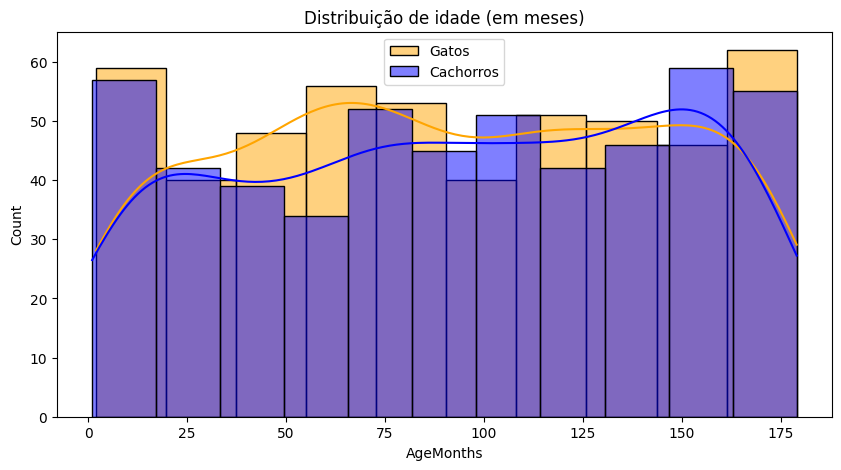

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(cats["AgeMonths"], kde=True, color="orange", label="Gatos")
sns.histplot(dogs["AgeMonths"], kde=True, color="blue", label="Cachorros")
plt.legend()
plt.title("Distribuição de idade (em meses)")
plt.show()

A distribuição de idades de gatos e cachorros no dataset mostra-se bastante semelhante, sem grandes diferenças estruturais entre as espécies. Observa-se uma leve predominância de jovens adultos, especialmente entre 60 e 80 meses (~5 a 6 anos), além de uma concentração expressiva de indivíduos jovens até 25 meses, com os cachorros ligeiramente mais representados nessa faixa inicial. Já nas idades mais avançadas, acima de 150 meses (cerca de 12 anos), ainda há presença significativa de animais idosos em ambos os grupos, indicando que o conjunto de dados não está enviesado apenas para filhotes.


Agora, vamos comparar a probabilidade de adoção entre gatos e cachorros.

In [ ]:
combined = pd.concat([cats, dogs], ignore_index=True)

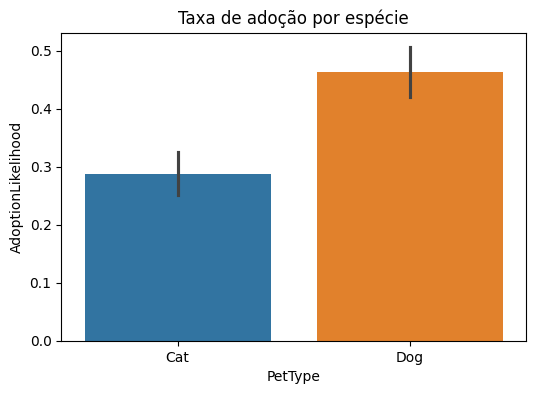

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="PetType",
    y="AdoptionLikelihood",
    hue="PetType",
    data=combined,
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Taxa de adoção por espécie")
plt.show()


O gráfico evidencia que a taxa média de adoção registrada no dataset é maior para cachorros (46%) do que para gatos (29%), indicando que cães apresentam uma probabilidade relativamente mais elevada de encontrarem um lar. Essa diferença sugere que fatores associados à espécie podem influenciar na decisão dos adotantes, embora seja importante considerar que outros atributos — como idade, porte, condição de saúde e custos envolvidos — também podem contribuir para esse resultado. Assim, a análise aponta uma tendência relevante, mas que deve ser interpretada em conjunto com demais variáveis para evitar conclusões simplistas. texto em negrito

Passemos à análise do tempo de permanência de gatos e cachorros no abrigo.

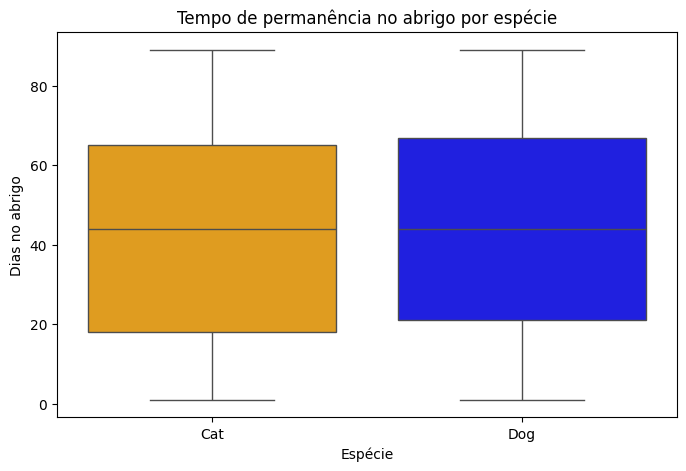

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="PetType",
    y="TimeInShelterDays",
    hue="PetType",
    data=combined,
    palette={"Cat": "orange", "Dog": "blue"},
    legend=False
)
plt.title("Tempo de permanência no abrigo por espécie")
plt.ylabel("Dias no abrigo")
plt.xlabel("Espécie")
plt.show()


O boxplot mostra que o tempo de permanência no abrigo é semelhante entre gatos e cachorros, com medianas próximas e ampla variação nos dois grupos. No entanto, observa-se que gatos tendem a concentrar mais casos de longas esperas, indicando que, quando não são adotados rapidamente, permanecem por períodos maiores no abrigo, enquanto os cachorros apresentam uma distribuição mais homogênea ao longo do tempo.

Analisando o tempo despendido no abrigo entre animais adotados e não adotados, temos o seguinte resultado:

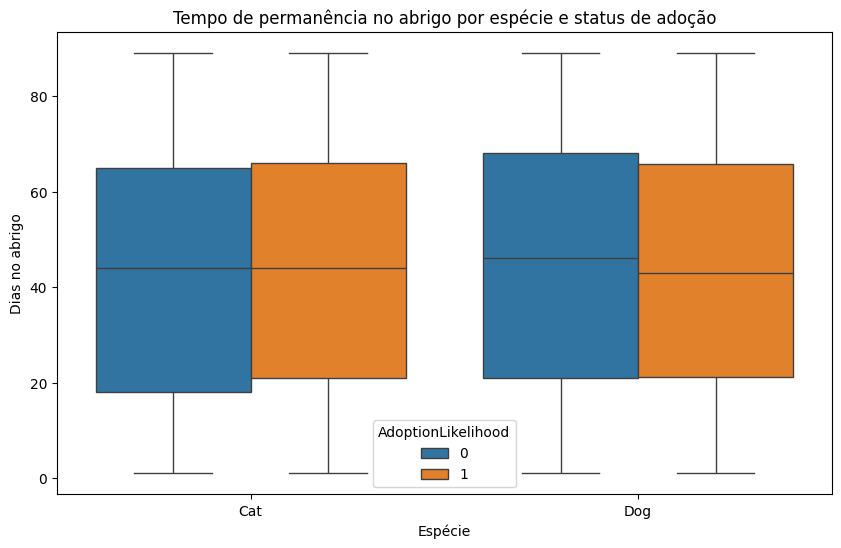

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="PetType", y="TimeInShelterDays", hue="AdoptionLikelihood", data=combined)
plt.title("Tempo de permanência no abrigo por espécie e status de adoção")
plt.ylabel("Dias no abrigo")
plt.xlabel("Espécie")
plt.show()

O gráfico mostra que o **tempo de permanência no abrigo** varia de forma parecida entre gatos e cachorros, tanto para os animais que foram adotados (1) quanto para os que não foram (0). Em ambas as espécies, a mediana dos dias no abrigo é próxima, mas percebe-se que os animais adotados tendem a permanecer um pouco menos tempo em comparação aos que não foram adotados. Isso indica que, independentemente da espécie, a chance de adoção está associada a uma redução no período de estadia, ainda que a distribuição geral dos tempos apresente grande variação nos dois grupos.

# Treinamento do Modelo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def treinar_arvore(
    df,
    target_column="AdoptionLikelihood",
    max_depth=5,
    show_tree=False,
    class_names=None
):
    # Copia para não mexer no df original
    df_model = df.copy()


    # Codificar a coluna alvo (y)

    y_raw = df_model[target_column]
    target_encoder = None

    if y_raw.dtype == "object":
        target_encoder = LabelEncoder()
        df_model[target_column] = target_encoder.fit_transform(y_raw)


    # Codificar features (X)
    X = df_model.drop(columns=[target_column])
    X_encoded = X.copy()
    feature_encoders = {}

    for col in X.columns:
        if X_encoded[col].dtype == "object":
            le = LabelEncoder()
            X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
            feature_encoders[col] = le

    y = df_model[target_column]


    # Train/test split

    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.25, random_state=42
    )


    model = DecisionTreeClassifier(
        criterion="gini",
        max_depth=max_depth,
        random_state=42
    )
    model.fit(X_train, y_train)


    # Avaliação

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)

    # Importância das features
    importances = (
        pd.Series(model.feature_importances_, index=X_encoded.columns)
        .sort_values(ascending=False)
    )


    # Exibir a árvore

        plt.figure(figsize=(24, 12))
        plot_tree(
            model,
            feature_names=X_encoded.columns,
            class_names=(
                [str(c) for c in sorted(y.unique())]
                if class_names is None else class_names
            ),
            filled=True,
            rounded=True,
            fontsize=8
        )
        plt.tight_layout()
        plt.show()

    return model, report, importances, feature_encoders, target_encoder


In [ ]:
cat_model, cat_report, cat_importances, cat_feat_enc, cat_target_enc = treinar_arvore(
    df_cats_encoded,
    target_column="AdoptionLikelihood",
    max_depth=5
)

print("=== RELATÓRIO - GATOS ===")
print(cat_report)
print("\n=== IMPORTÂNCIA DAS FEATURES (GATOS) ===")
print(cat_importances)


=== RELATÓRIO - GATOS ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        90
           1       0.82      0.84      0.83        37

    accuracy                           0.90       127
   macro avg       0.87      0.88      0.88       127
weighted avg       0.90      0.90      0.90       127


=== IMPORTÂNCIA DAS FEATURES (GATOS) ===
Size_Medium          0.303633
AgeMonths            0.213684
HealthCondition      0.204103
Vaccinated           0.201951
AdoptionFee          0.035091
TimeInShelterDays    0.026943
Color_White          0.013590
Color_Black          0.001005
PetType              0.000000
Breed_Siamese        0.000000
Breed_Persian        0.000000
PreviousOwner        0.000000
Color_Brown          0.000000
Color_Orange         0.000000
Color_Gray           0.000000
Size_Large           0.000000
Size_Small           0.000000
dtype: float64


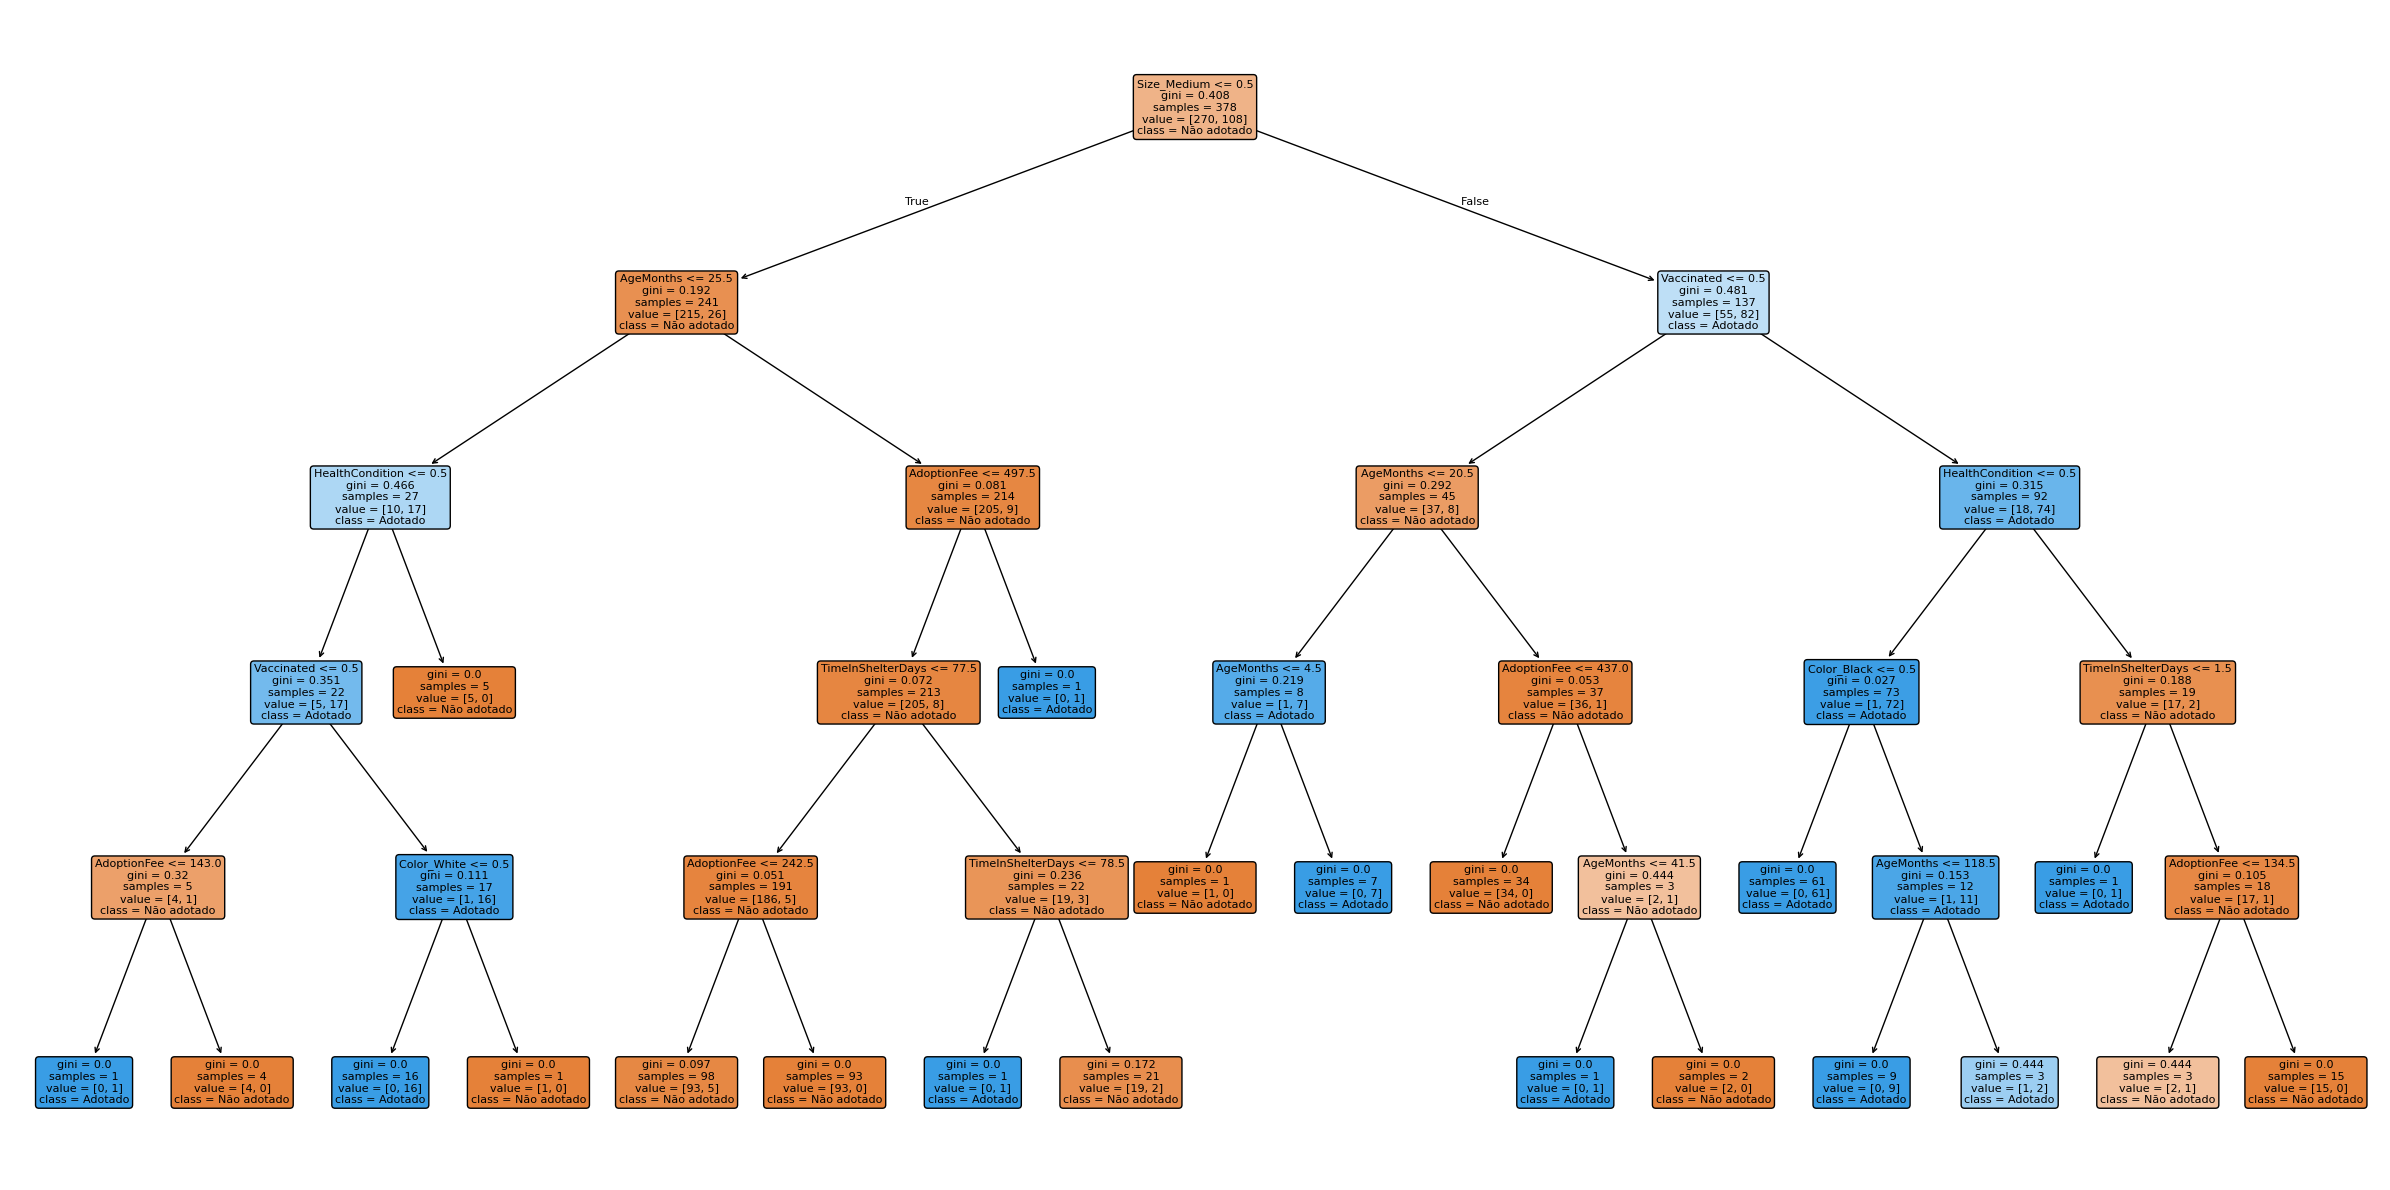

In [ ]:
cat_model, cat_report, cat_importances, cat_feat_enc, cat_target_enc = treinar_arvore(
    df_cats_encoded,
    target_column="AdoptionLikelihood",
    max_depth=5,
    show_tree=True,
    class_names=["Não adotado", "Adotado"]
)


In [ ]:
dog_model, dog_report, dog_importances, dog_feat_enc, dog_target_enc = treinar_arvore(
    df_dogs_encoded,
    target_column="AdoptionLikelihood",
    max_depth=5
)

print("=== RELATÓRIO - CACHORROS ===")
print(dog_report)
print("\n=== IMPORTÂNCIA DAS FEATURES (CACHORROS) ===")
print(dog_importances)


=== RELATÓRIO - CACHORROS ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        72
           1       0.96      0.83      0.89        59

    accuracy                           0.91       131
   macro avg       0.92      0.90      0.91       131
weighted avg       0.91      0.91      0.91       131


=== IMPORTÂNCIA DAS FEATURES (CACHORROS) ===
Vaccinated                0.245949
Breed_Labrador            0.245076
Size_Medium               0.188748
HealthCondition           0.150077
AgeMonths                 0.114538
AdoptionFee               0.017390
TimeInShelterDays         0.015272
Color_Orange              0.013804
Size_Small                0.004836
PreviousOwner             0.004310
PetType                   0.000000
Breed_Golden Retriever    0.000000
Breed_Poodle              0.000000
Color_Black               0.000000
Color_Gray                0.000000
Color_Brown               0.000000
Size_Large                0.000000
Co

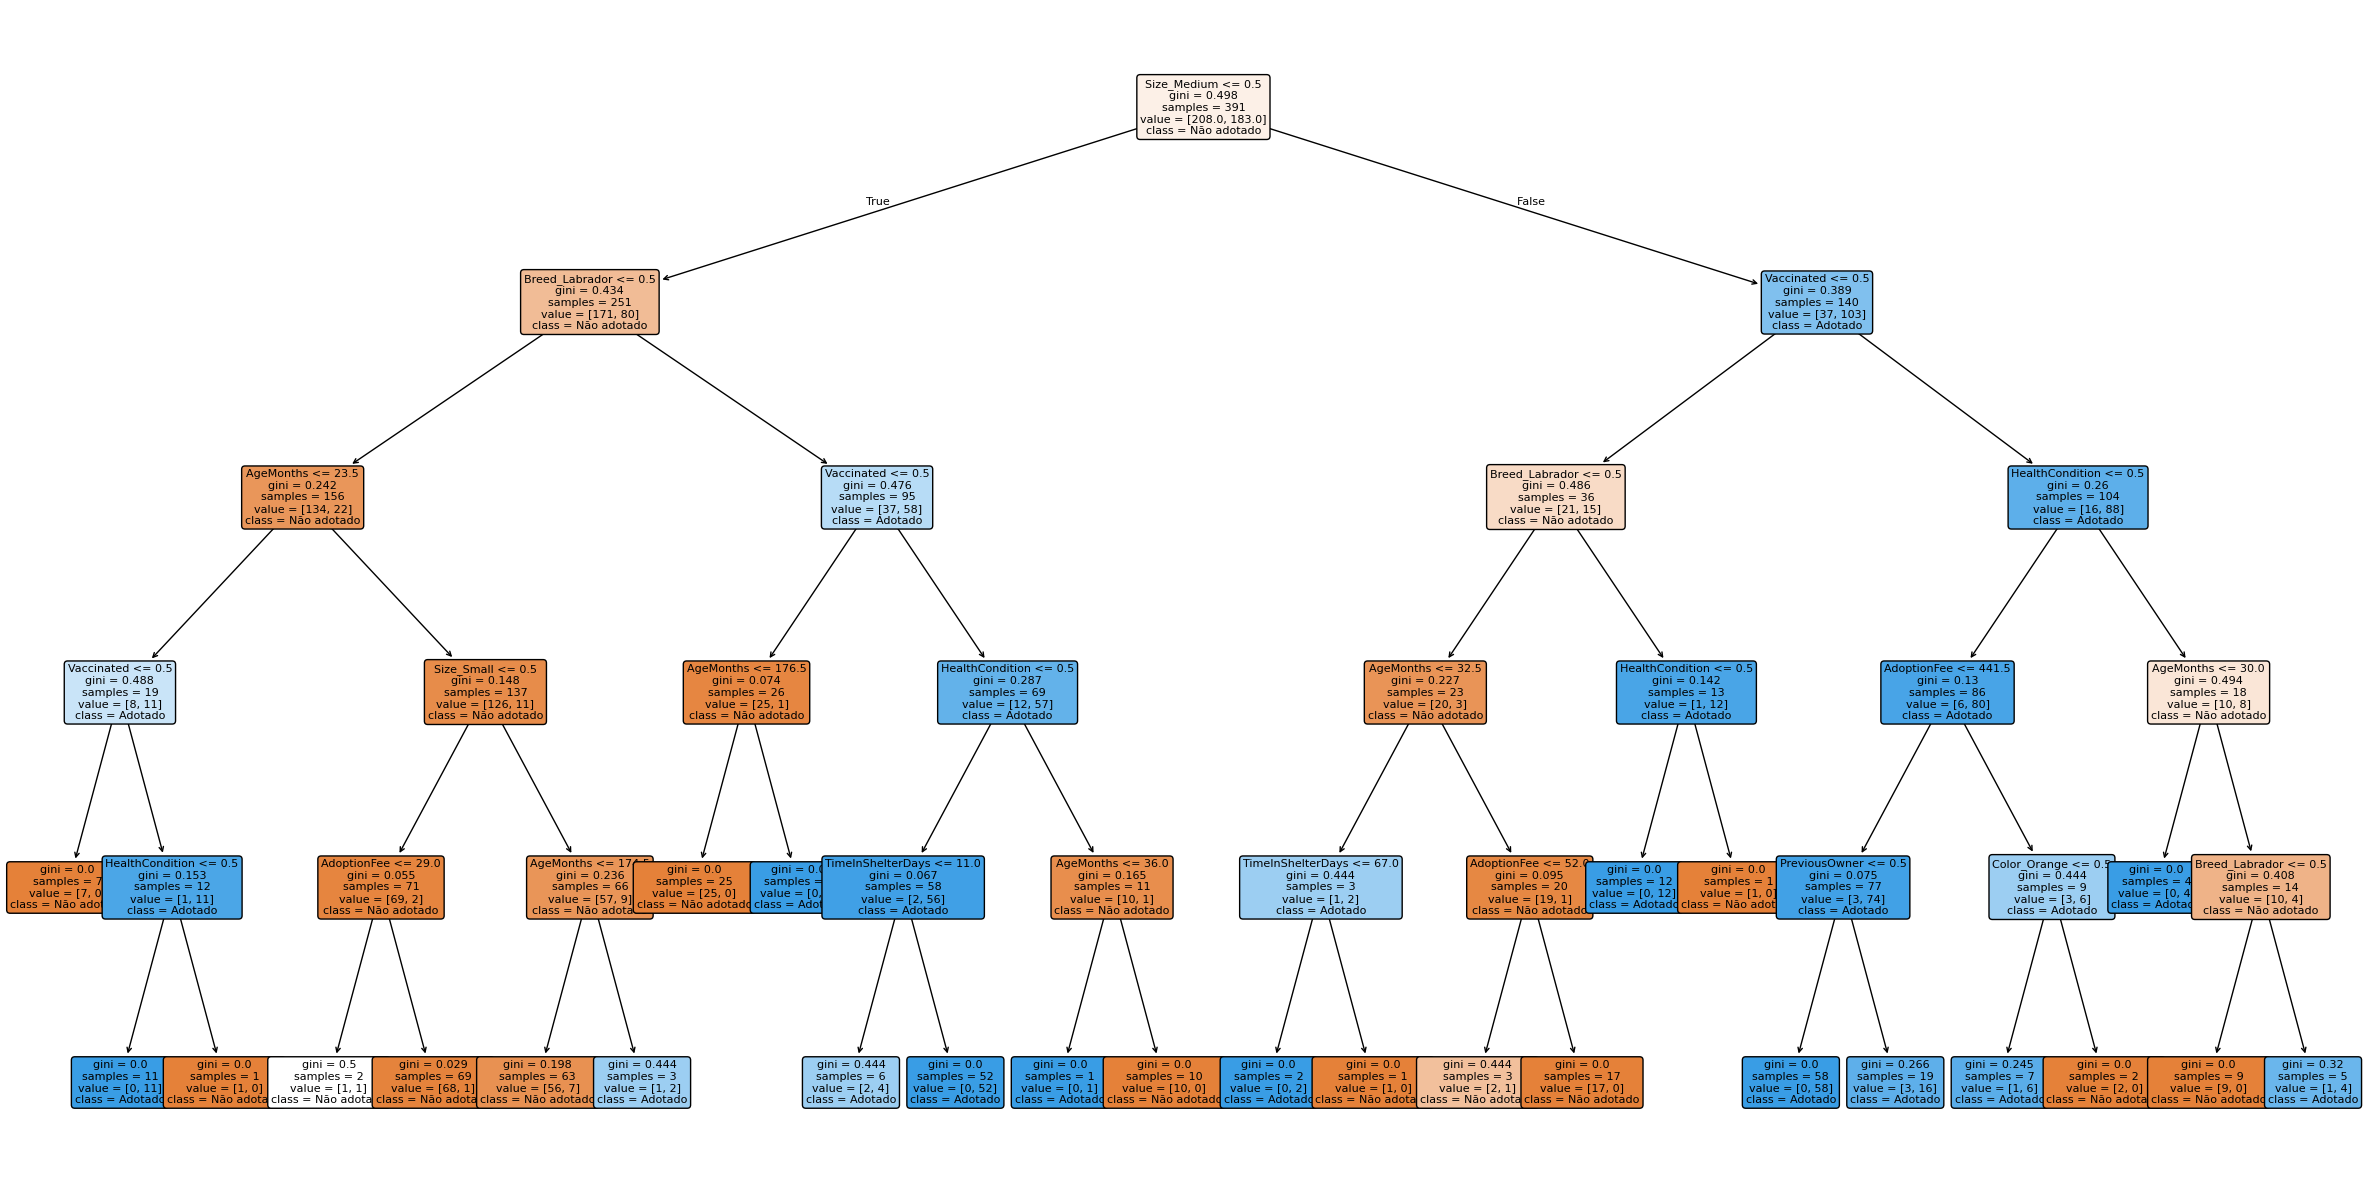

In [ ]:
dog_model, dog_report, dog_importances, dog_feat_enc, dog_target_enc = treinar_arvore(
    df_dogs_encoded,
    target_column="AdoptionLikelihood",
    max_depth=5,
    show_tree=True,
    class_names=["Não adotado", "Adotado"]
)


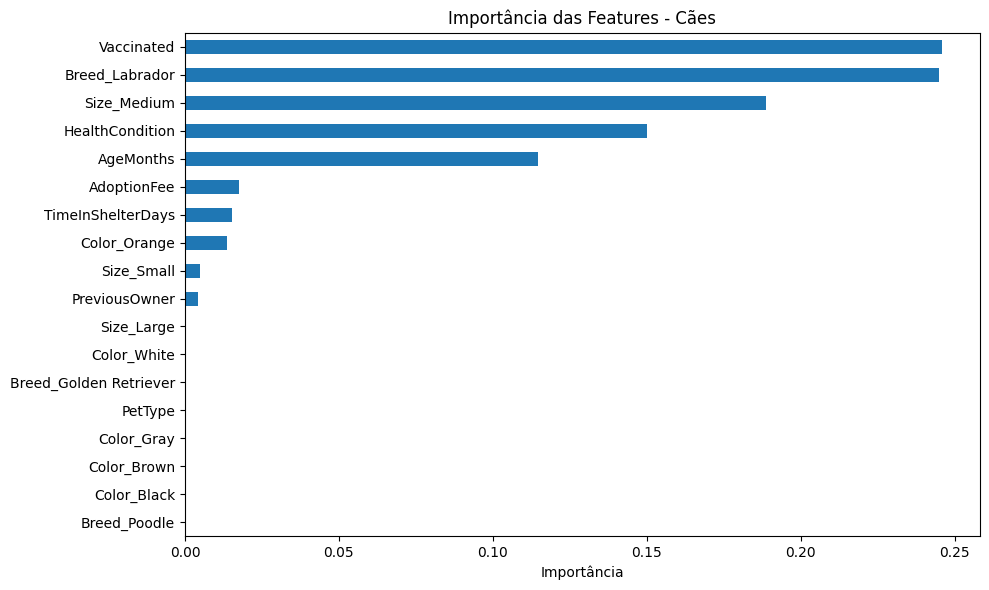

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
dog_importances.sort_values(ascending=True).plot(kind="barh")
plt.title("Importância das Features - Cães")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()




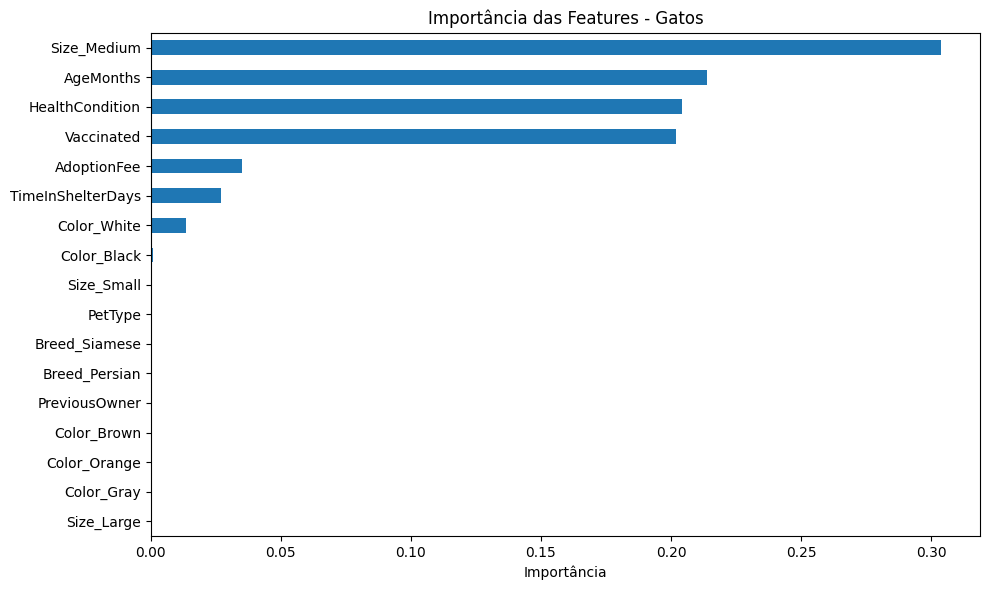

In [ ]:
plt.figure(figsize=(10, 6))
cat_importances.sort_values(ascending=True).plot(kind="barh")
plt.title("Importância das Features - Gatos")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()

## Aplicando Regressão Linear


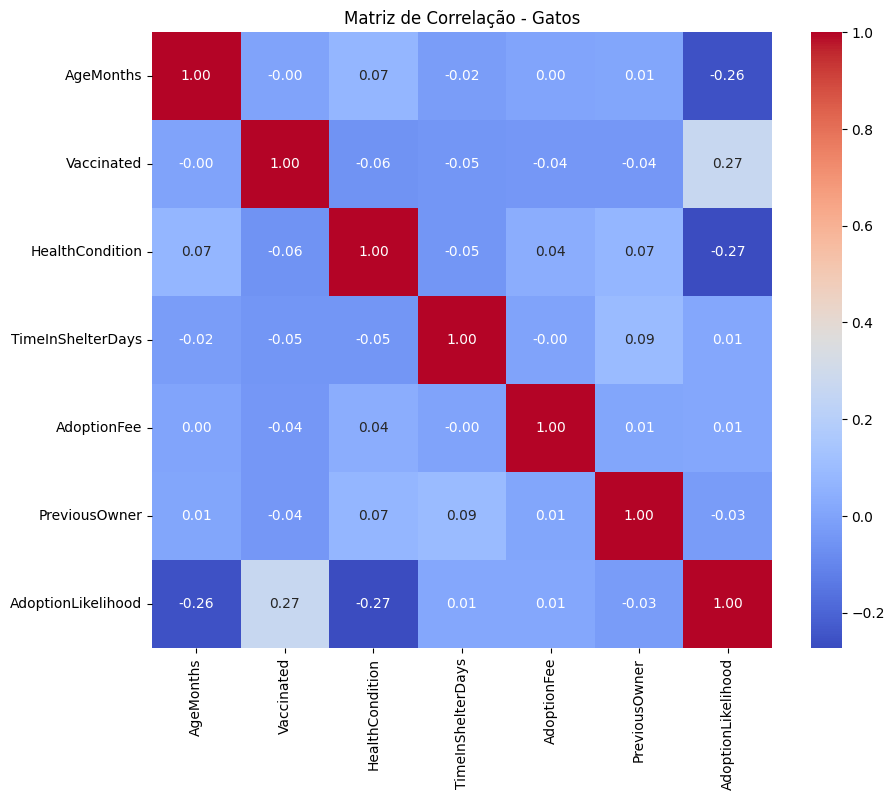

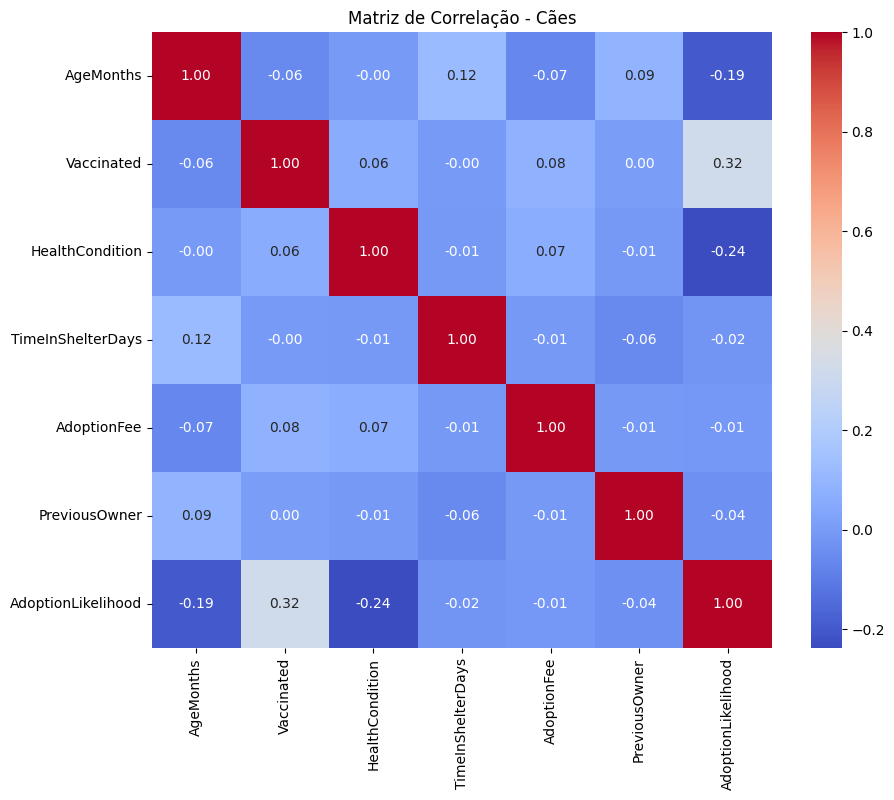


=== Correlação com TimeInShelterDays (Gatos) ===
TimeInShelterDays     1.000000
PreviousOwner         0.090563
AdoptionLikelihood    0.012054
AdoptionFee          -0.004637
AgeMonths            -0.022975
Vaccinated           -0.046520
HealthCondition      -0.048545
Name: TimeInShelterDays, dtype: float64

=== Correlação com TimeInShelterDays (Cães) ===
TimeInShelterDays     1.000000
AgeMonths             0.119174
Vaccinated           -0.001981
AdoptionFee          -0.008664
HealthCondition      -0.009419
AdoptionLikelihood   -0.020269
PreviousOwner        -0.057325
Name: TimeInShelterDays, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cats = pd.read_csv("/content/pet_adoption_data_cats_clean.csv")
dogs = pd.read_csv("/content/pet_adoption_data_dogs_clean.csv")


cats_num = cats.select_dtypes(include="number")
dogs_num = dogs.select_dtypes(include="number")


# Matriz de correlação completa

corr_cats = cats_num.corr()
corr_dogs = dogs_num.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_cats, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Gatos")
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_dogs, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Cães")
plt.show()


# Correlação apenas com TimeInShelterDays

print("\n=== Correlação com TimeInShelterDays (Gatos) ===")
print(corr_cats["TimeInShelterDays"].sort_values(ascending=False))

print("\n=== Correlação com TimeInShelterDays (Cães) ===")
print(corr_dogs["TimeInShelterDays"].sort_values(ascending=False))


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# carregar dataset de gatos
cats = pd.read_csv("/content/pet_adoption_data_cats_clean.csv")

# padronizar variáveis numéricas
cols_to_scale = ["AgeMonths", "Vaccinated", "HealthCondition", "AdoptionFee"]

for col in cols_to_scale:
    cats[col + "_z"] = (cats[col] - cats[col].mean()) / cats[col].std()

# nova fórmula usando as versões padronizadas
formula_cats = """
TimeInShelterDays ~
AgeMonths_z +
Vaccinated_z +
HealthCondition_z +
AdoptionFee_z
"""

model_cats = smf.ols(formula=formula_cats, data=cats)
result_cats = model_cats.fit()

print("===== Regressão Linear - Gatos (Padronizada) =====")
print(result_cats.summary())


===== Regressão Linear - Gatos (Padronizada) =====
                            OLS Regression Results                            
Dep. Variable:      TimeInShelterDays   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6520
Date:                Fri, 21 Nov 2025   Prob (F-statistic):              0.626
Time:                        21:10:06   Log-Likelihood:                -2361.7
No. Observations:                 505   AIC:                             4733.
Df Residuals:                     500   BIC:                             4754.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# carregar dataset de gatos
cats = pd.read_csv("/content/pet_adoption_data_dogs_clean.csv")

# padronizar variáveis numéricas
cols_to_scale = ["AgeMonths", "Vaccinated", "HealthCondition", "AdoptionFee"]

for col in cols_to_scale:
    cats[col + "_z"] = (cats[col] - cats[col].mean()) / cats[col].std()

# nova fórmula usando as versões padronizadas
formula_cats = """
TimeInShelterDays ~
AgeMonths_z +
Vaccinated_z +
HealthCondition_z +
AdoptionFee_z
"""

model_cats = smf.ols(formula=formula_cats, data=cats)
result_cats = model_cats.fit()

print("===== Regressão Linear - Gatos (Padronizada) =====")
print(result_cats.summary())


===== Regressão Linear - Gatos (Padronizada) =====
                            OLS Regression Results                            
Dep. Variable:      TimeInShelterDays   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.877
Date:                Fri, 21 Nov 2025   Prob (F-statistic):              0.113
Time:                        21:10:30   Log-Likelihood:                -2430.8
No. Observations:                 522   AIC:                             4872.
Df Residuals:                     517   BIC:                             4893.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

## Teste com um cachorro gerado

In [ ]:
feature_cols_dogs = df_dogs_encoded.columns.drop("AdoptionLikelihood")
feature_cols_dogs


Index(['PetType', 'AgeMonths', 'Vaccinated', 'HealthCondition',
       'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner',
       'Breed_Golden Retriever', 'Breed_Labrador', 'Breed_Poodle',
       'Color_Black', 'Color_Brown', 'Color_Gray', 'Color_Orange',
       'Color_White', 'Size_Large', 'Size_Medium', 'Size_Small'],
      dtype='object')

In [ ]:
novo_cachorro = {
    "PetType": "Dog",
    "AgeMonths": 36,
    "Vaccinated": 1,
    "HealthCondition": 1,
    "TimeInShelterDays": 12,
    "AdoptionFee": 200,
    "PreviousOwner": 0,
    "Breed_Golden Retriever": 0,
    "Breed_Labrador": 1,
    "Breed_Poodle": 0,
    "Color_Black": 0,
    "Color_Brown": 1,
    "Color_Gray": 0,
    "Color_Orange": 0,
    "Color_White": 0,
    "Size_Large": 0,
    "Size_Medium": 1,
    "Size_Small": 0
}


In [ ]:
X_novo = pd.DataFrame([novo_cachorro])


In [ ]:
for col, encoder in dog_feat_enc.items():
    X_novo[col] = encoder.transform(X_novo[col])


In [ ]:
X_novo = X_novo[feature_cols_dogs]


In [ ]:
y_pred = dog_model.predict(X_novo)[0]

if y_pred == 1:
    print("Resultado: O cachorro SERÁ adotado.")
else:
    print("Resultado: O cachorro NÃO será adotado.")



Resultado: O cachorro SERÁ adotado.
